In [4]:
import numpy as np
import polars as pl
import pyadcirc.io.read_fort14 as rf14
from pyadcirc.log import logger
from pyadcirc.msh.ADCIRCMesh import ADCIRCMesh
import importlib
from libpysal import weights, examples
from libpysal.cg import voronoi_frames
from contextily import add_basemap
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas

logger.enable('pyadcirc')

base_mesh_path = '/Users/carlos/repos/GBPP/scenarios/scenario_1/msh/fort.14'
test_mesh_bad= '/Users/carlos/repos/pyadcirc/tests/bad_si/fort.14'
test_mesh = '/Users/carlos/repos/pyadcirc/tests/si/fort.14'
clean_test_mesh = 'fort_modified.14'
mesh_path =  test_mesh 
bad_mesh = test_mesh

In [5]:
msh = ADCIRCMesh(mesh_path)
msh.get_data()

2023-09-30 21:14:33.760 | INFO     | pyadcirc.io.read_fort14:load_f14:350 - Getting AGRID, NP, NE for fort.14 file at /Users/carlos/repos/pyadcirc/tests/si/fort.14...
2023-09-30 21:14:33.763 | INFO     | pyadcirc.io.read_fort14:load_f14:352 - Mesh params: {'AGRID': 'Shinnecock Inlet Coarse Grid', 'NE': 5780, 'NP': 3070}
2023-09-30 21:14:33.763 | INFO     | pyadcirc.io.read_fort14:load_f14:354 - Building raw data query...
2023-09-30 21:14:33.773 | INFO     | pyadcirc.io.read_fort14:load_f14:357 - Validating fort.14 file...
2023-09-30 21:14:33.803 | INFO     | pyadcirc.io.read_fort14:load_f14:363 - raw_data query: naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)


  Csv SCAN /Users/carlos/repos/pyadcirc/tests/si/fort.14
  PROJECT */8 COLUMNS
Loading...
2023-09-30 21:14:33.813 | INFO     | pyadcirc.io.read_fort14:load_f14:365 - Done loading raw data: {raw_data}
2023-09-30 21:14:33.813 | INFO     | pyadcirc.io.read_fort14:load_f14:367 - Loading node map with 30

NameError: name 'element_gdf' is not defined

In [3]:
node_gdf = msh.get_node_gdf()
node_gdf

,0,1,2,3,geometry
0,1.0,-72.057678,40.990232,4.287804,POINT (-72.05768 40.99023)
1,2.0,-72.052194,40.971343,13.825031,POINT (-72.05219 40.97134)
2,3.0,-72.046969,40.952381,20.911768,POINT (-72.04697 40.95238)
3,4.0,-72.041922,40.933371,26.731834,POINT (-72.04192 40.93337)
4,5.0,-72.038364,40.914063,29.506327,POINT (-72.03836 40.91406)
...,...,...,...,...,...
3065,3066.0,-72.585409,40.821305,1.085000,POINT (-72.58541 40.82131)
3066,3067.0,-72.585885,40.815623,2.286951,POINT (-72.58589 40.81562)
3067,3068.0,-72.585996,40.813074,1.747097,POINT (-72.58600 40.81307)
3068,3069.0,-72.586352,40.818835,1.500000,POINT (-72.58635 40.81883)


In [6]:
msh.element_map.to_pandas()

,JE,NHY,NM_1,NM_2,NM_3,X,Y,DP,X_2,Y_2,DP_2,X_3,Y_3,DP_3
0,1,3,77,76,1,-72.082624,40.981371,4.698896,-72.069097,40.972053,12.277857,-72.057678,40.990232,4.287804
1,2,3,76,2,1,-72.069097,40.972053,12.277857,-72.052194,40.971343,13.825031,-72.057678,40.990232,4.287804
2,3,3,78,2,76,-72.070015,40.952217,20.499847,-72.052194,40.971343,13.825031,-72.069097,40.972053,12.277857
3,4,3,2,78,3,-72.052194,40.971343,13.825031,-72.070015,40.952217,20.499847,-72.046969,40.952381,20.911768
4,5,3,3,78,79,-72.046969,40.952381,20.911768,-72.070015,40.952217,20.499847,-72.059546,40.936521,25.673622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,5776,3,3065,3067,3064,-72.583869,40.818335,1.500000,-72.585885,40.815623,2.286951,-72.582459,40.815745,1.500000
5776,5777,3,3068,3064,3067,-72.585996,40.813074,1.747097,-72.582459,40.815745,1.500000,-72.585885,40.815623,2.286951
5777,5778,3,3069,3065,3066,-72.586352,40.818835,1.500000,-72.583869,40.818335,1.500000,-72.585409,40.821305,1.085000
5778,5779,3,3065,3069,3067,-72.583869,40.818335,1.500000,-72.586352,40.818835,1.500000,-72.585885,40.815623,2.286951


In [3]:
element_gdf = msh.get_element_gdf()
element_gdf

,JE,NHY,NM_1,NM_2,NM_3,X,Y,DP,X_1,Y_1,DP_1,X_2,Y_2,DP_2,X_3,Y_3,DP_3,geometry,centroid
0,1,3,77,76,1,NaN,NaN,NaN,-72.082624,40.981371,4.698896,-72.069097,40.972053,12.277857,-72.057678,40.990232,4.287804,"POLYGON ((-72.08262 40.98137, -72.06910 40.972...",POINT (-72.06980 40.98122)
1,2,3,76,2,1,NaN,NaN,NaN,-72.069097,40.972053,12.277857,-72.052194,40.971343,13.825031,-72.057678,40.990232,4.287804,"POLYGON ((-72.06910 40.97205, -72.05219 40.971...",POINT (-72.05966 40.97788)
2,3,3,78,2,76,NaN,NaN,NaN,-72.070015,40.952217,20.499847,-72.052194,40.971343,13.825031,-72.069097,40.972053,12.277857,"POLYGON ((-72.07002 40.95222, -72.05219 40.971...",POINT (-72.06377 40.96520)
3,4,3,2,78,3,NaN,NaN,NaN,-72.052194,40.971343,13.825031,-72.070015,40.952217,20.499847,-72.046969,40.952381,20.911768,"POLYGON ((-72.05219 40.97134, -72.07002 40.952...",POINT (-72.05639 40.95865)
4,5,3,3,78,79,NaN,NaN,NaN,-72.046969,40.952381,20.911768,-72.070015,40.952217,20.499847,-72.059546,40.936521,25.673622,"POLYGON ((-72.04697 40.95238, -72.07002 40.952...",POINT (-72.05884 40.94704)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,5776,3,3065,3067,3064,NaN,NaN,NaN,-72.583869,40.818335,1.500000,-72.585885,40.815623,2.286951,-72.582459,40.815745,1.500000,"POLYGON ((-72.58387 40.81834, -72.58589 40.815...",POINT (-72.58407 40.81657)
5776,5777,3,3068,3064,3067,NaN,NaN,NaN,-72.585996,40.813074,1.747097,-72.582459,40.815745,1.500000,-72.585885,40.815623,2.286951,"POLYGON ((-72.58600 40.81307, -72.58246 40.815...",POINT (-72.58478 40.81481)
5777,5778,3,3069,3065,3066,NaN,NaN,NaN,-72.586352,40.818835,1.500000,-72.583869,40.818335,1.500000,-72.585409,40.821305,1.085000,"POLYGON ((-72.58635 40.81883, -72.58387 40.818...",POINT (-72.58521 40.81949)
5778,5779,3,3065,3069,3067,NaN,NaN,NaN,-72.583869,40.818335,1.500000,-72.586352,40.818835,1.500000,-72.585885,40.815623,2.286951,"POLYGON ((-72.58387 40.81834, -72.58635 40.818...",POINT (-72.58537 40.81760)


In [5]:
# read in example data from a geopackage file. Geopackages
# are a format for storing geographic data that is backed
# by sqlite. geopandas reads data relying on the fiona package,
# providing a high-level pandas-style interface to geographic data.
# Many different kinds of geographic data formats can be read by geopandas.
# cases = geopandas.read_file("cholera_cases.gpkg")

# In order for networkx to plot the nodes of our graph correctly, we
# need to construct the array of coordinates for each point in our dataset.
# To get this as a numpy array, we extract the x and y coordinates from the
# geometry column.
coordinates = np.column_stack((node_gdf.geometry.x, node_gdf.geometry.y))
coordinates

array([[-72.05767827,  40.99023169],
       [-72.05219374,  40.97134268],
       [-72.04696872,  40.95238073],
       ...,
       [-72.585996  ,  40.813074  ],
       [-72.586352  ,  40.818835  ],
       [-72.589697  ,  40.813418  ]])

In [6]:
# While we could simply present the Delaunay graph directly, it is useful to
# visualize the Delaunay graph alongside the Voronoi diagram. This is because
# the two are intrinsically linked: the adjacency graph of the Voronoi diagram
# is the Delaunay graph for the set of generator points! Put simply, this means
# we can build the Voronoi diagram (relying on scipy.spatial for the underlying
# computations), and then convert these polygons quickly into the Delaunay graph.
# Be careful, though; our algorithm, by default, will clip the voronoi diagram to
# the bounding box of the point pattern. This is controlled by the "clip" argument.
cells, generators = voronoi_frames(coordinates, clip="convex hull")

# With the voronoi polygons, we can construct the adjacency graph between them using
# "Rook" contiguity. This represents voronoi cells as being adjacent if they share
# an edge/face. This is an analogue to the "von Neuman" neighborhood, or the 4 cardinal
# neighbors in a regular grid. The name comes from the directions a Rook piece can move
# on a chessboard.
delaunay = weights.Rook.from_dataframe(cells)

/Users/carlos/.mm/envs/pyadcirc/lib/python3.11/site-packages/libpysal/cg/voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
/Users/carlos/.mm/envs/pyadcirc/lib/python3.11/site-packages/libpysal/cg/voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFr

<Axes: >

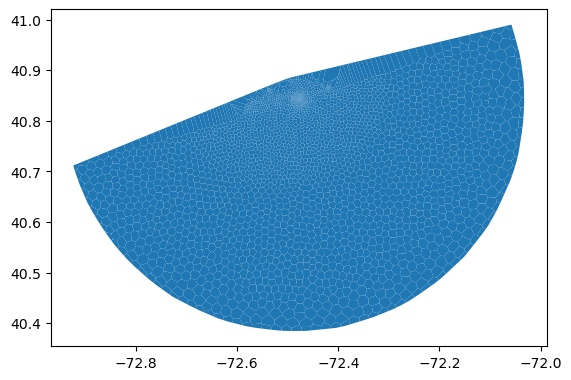

In [7]:
cells.plot()

/Users/carlos/.mm/envs/pyadcirc/lib/python3.11/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


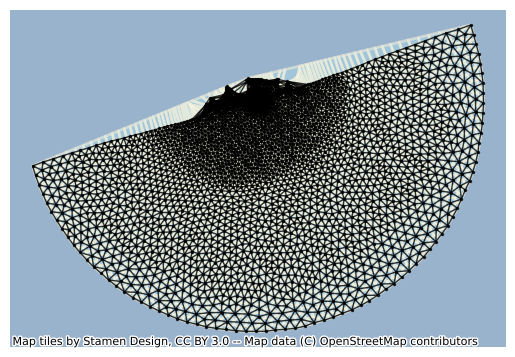

In [8]:
# Once the graph is built, we can convert the graphs to networkx objects using the
# relevant method.
delaunay_graph = delaunay.to_networkx()

# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx
positions = dict(zip(delaunay_graph.nodes, coordinates))

# Now, we can plot with a nice basemap.
ax = cells.plot(facecolor="lightblue", alpha=0.50, edgecolor="cornsilk", linewidth=2)
add_basemap(ax)
ax.axis("off")
nx.draw(
    delaunay_graph,
    positions,
    ax=ax,
    node_size=2,
    node_color="k",
    edge_color="k",
    alpha=0.8,
)
plt.show()

In [12]:
from geopandas import GeoDataFrame
from shapely import Polygon, Point, LineString

def test(element_gdf) -> GeoDataFrame:

    element_gdf["geometry"] = element_gdf.apply(
        lambda row: Polygon(
            [
                (row["X_1"], row["Y_1"]),
                (row["X_2"], row["Y_2"]),
                (row["X_3"], row["Y_3"]),
            ]
        ),
        axis=1,
    )
    
    element_gdf = GeoDataFrame(element_gdf, geometry="geometry")
    element_gdf["centroid"] = element_gdf["geometry"].centroid
    
    # Add point geometry for each node
    for i in range(1, 4):
        col_name = f"n_{i}"
        element_gdf[col_name] = element_gdf.apply(
            lambda row: Point(row[f"X_{i}"], row[f"Y_{i}"]), axis=1
        )
    
    # Add line geometry for each edge
    for i, j in [(1, 2), (2, 3), (3, 1)]:
        col_name = f"e_{i}{j}"
        element_gdf[col_name] = element_gdf.apply(
            lambda row: LineString([(row[f"X_{i}"], row[f"Y_{i}"]), (row[f"X_{j}"], row[f"Y_{j}"])]), axis=1
        )
        
    # Calculate lengths for each edge
    for i, j in [(1, 2), (2, 3), (3, 1)]:
        col_name = f"l_{i}{j}"
        element_gdf[col_name] = element_gdf.apply(
            lambda row: row[f"e_{i}{j}"].length, axis=1
        )
    
    return element_gdf

# Run the function and check the output

element_gdf = test(msh.element_map.to_pandas())


In [14]:
import pandas as pd 

# Create separate DataFrames for each set of edges (NM_1 to NM_2, NM_2 to NM_3, and NM_3 to NM_1)
edge_list_12 = element_gdf[["NM_1", "NM_2", "l_12"]].rename(columns={"NM_1": "Source", "NM_2": "Target", "l_12": "Weight"})
edge_list_23 = element_gdf[["NM_2", "NM_3", "l_23"]].rename(columns={"NM_2": "Source", "NM_3": "Target", "l_23": "Weight"})
edge_list_31 = element_gdf[["NM_3", "NM_1", "l_31"]].rename(columns={"NM_3": "Source", "NM_1": "Target", "l_31": "Weight"})

# Concatenate the three DataFrames to create the final edge list
edge_list = pd.concat([edge_list_12, edge_list_23, edge_list_31], ignore_index=True)

edge_list

,Source,Target,Weight
0,77,76,0.016425
1,76,2,0.016919
2,78,2,0.026142
3,2,78,0.026142
4,3,78,0.023047
...,...,...,...
17335,3064,3065,0.002949
17336,3067,3068,0.002551
17337,3066,3069,0.002644
17338,3067,3065,0.003380


In [16]:
Graph = nx.from_pandas_edgelist(edge_list, source="Source", target="Target", edge_attr="Weight")
Graph